In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from PIL import Image
import cv2

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

os.environ["CUDA_VISIBLE_DEVICES"] = ""
sys.path.insert(0, "../")

from mystique.initial_setups import set_graph_and_tensors
from mystique.predict_card import PredictCard
from mystique.detect_objects import ObjectDetection
from mystique.utils import plot_results


# This is needed to display the images.
%matplotlib inline

In [3]:
def predict_bbox(img_path) -> np.array:
    """
    Predict the bounding boxes, class label and draw the bbox
    on the original image.
    """
    img = Image.open(img_path)
    img_np = np.asarray(img)
    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    img_np_copy = img_np.copy()
    object_detection = ObjectDetection()
    
    output, category = object_detection.get_objects(img_np, img)
    # google models wants ymin, xmin, ymax, xmax format.
    # output["detection_boxes"] = output["detection_boxes"][:, [1, 0, 3, 2]]
    
    _img = plot_results(img,
                 output["detection_classes"],
                 output["detection_scores"],
                 output["detection_boxes"]
                )
    return _img

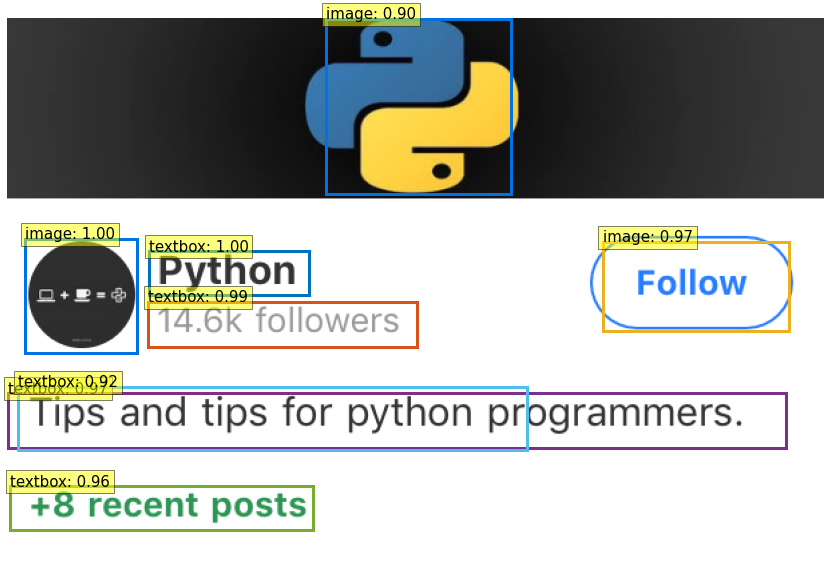

In [5]:
img_path = "/home/haridas/projects/AdaptiveCards-ro/source/pic2card/app/assets/samples/3.png"
predict_bbox(img_path)

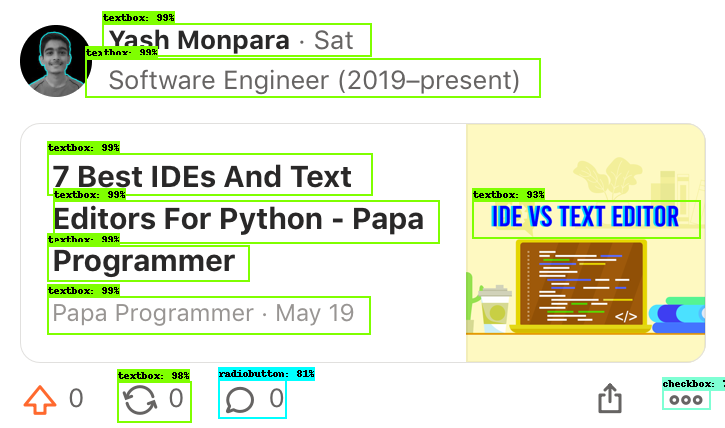

In [27]:
img_path = "/home/haridas/projects/AdaptiveCards-ro/source/pic2card/app/assets/samples/5.png"
Image.fromarray(predict_bbox(img_path))